[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuropucp/lab-book/blob/main/book/codigoEDA.ipynb)

# Análisis de señales EDA

Instalamos los paquetes necesarios:

In [ ]:
!pip install neurokit2

Para este tutorial usaremos datos EDA extraidos con el sistema Nuanic:

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/neuropucp/lab-book/refs/heads/main/res/nuanic-sample.csv")
df = df[df.eda.isin([r"\N"]) == False]
df["eda"] = pd.to_numeric(df["eda"])
df

,address,time_unix,time,dne,srl,srrn,eda
0,RP01006,1710921858,2024-03-20 08:04:17.7+00,\N,\N,\N,691471
1,RP01006,1710921858,2024-03-20 08:04:18.033+00,\N,\N,\N,691471
2,RP01006,1710921858,2024-03-20 08:04:18.366+00,\N,\N,\N,636675
3,RP01006,1710921859,2024-03-20 08:04:18.699+00,\N,\N,\N,638482
4,RP01006,1710921859,2024-03-20 08:04:19.032+00,\N,\N,\N,623489
...,...,...,...,...,...,...,...
755,RP01006,1710922109,2024-03-20 08:08:29.134+00,\N,\N,\N,545832
756,RP01006,1710922109,2024-03-20 08:08:29.467+00,\N,\N,\N,546271
757,RP01006,1710922110,2024-03-20 08:08:29.8+00,\N,\N,\N,546858
758,RP01006,1710922110,2024-03-20 08:08:30.143+00,\N,\N,\N,545539


Visualizamos los datos:

<Axes: xlabel='time_unix', ylabel='eda'>

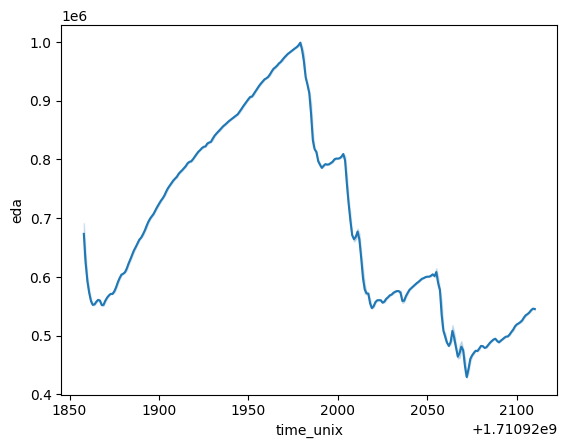

In [4]:
import seaborn as sns

sns.lineplot(x="time_unix", y="eda", data=df)

Ejecutamos el pipeline básico de Neurokit 2 para preprocesar señales EDA (`eda_process`):

In [ ]:
import neurokit2 as nk

eda_signal = df.eda
signals, info = nk.eda_process(eda_signal, sampling_rate=3, method="neurokit")

/home/renato-paredes/.virtualenvs/neuropucp-book/lib/python3.11/site-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(


,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,691471,691471,687455.100896,4015.899104,0,0,0.000000,0.000000,0.000000,0,0.000000
1,691471,691471,679136.588654,12334.411346,0,1,12334.411346,NaN,NaN,0,0.000000
2,636675,636675,670828.936886,-34153.936886,1,0,0.000000,0.000000,0.000000,0,0.000000
3,638482,638482,662584.010933,-24102.010933,0,1,-24102.010933,10051.925954,0.333333,0,0.000000
4,623489,623489,654451.571895,-30962.571895,0,0,0.000000,0.000000,0.000000,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
755,545832,545832,540423.042406,4079.092162,0,0,0.000000,0.000000,0.000000,0,0.000000
756,546271,546271,540726.655949,4021.481218,0,0,0.000000,0.000000,0.000000,0,0.000000
757,546858,546858,540985.584887,4143.764348,0,0,0.000000,0.000000,0.000000,0,0.000000
758,545539,545539,541202.428315,2389.735389,0,0,0.000000,0.000000,0.000000,0,0.000000


Obtenemos los indicadores de la señal:

In [10]:
signals

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,691471,691471,687455.100896,4015.899104,0,0,0.000000,0.000000,0.000000,0,0.000000
1,691471,691471,679136.588654,12334.411346,0,1,12334.411346,NaN,NaN,0,0.000000
2,636675,636675,670828.936886,-34153.936886,1,0,0.000000,0.000000,0.000000,0,0.000000
3,638482,638482,662584.010933,-24102.010933,0,1,-24102.010933,10051.925954,0.333333,0,0.000000
4,623489,623489,654451.571895,-30962.571895,0,0,0.000000,0.000000,0.000000,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
755,545832,545832,540423.042406,4079.092162,0,0,0.000000,0.000000,0.000000,0,0.000000
756,546271,546271,540726.655949,4021.481218,0,0,0.000000,0.000000,0.000000,0,0.000000
757,546858,546858,540985.584887,4143.764348,0,0,0.000000,0.000000,0.000000,0,0.000000
758,545539,545539,541202.428315,2389.735389,0,0,0.000000,0.000000,0.000000,0,0.000000


Y la información relevante a analizar:

In [11]:
info

{'SCR_Onsets': array([ nan,   2.,  10.,  33., 350., 378., 424., 450., 473., 496., 522.,
        572., 612., 629., 642., 676.]),
 'SCR_Peaks': array([  1,   3,  27,  41, 365, 380, 438, 461, 479, 498, 525, 593, 620,
        633, 657, 691]),
 'SCR_Height': array([ 12334.41134572, -24102.01093259,   8602.53410696,   7449.97443911,
         29111.04292567,  16716.72896096,  39488.53276245,  33557.95909724,
         -3785.74033518,   6299.49014949,   7393.10553502,  39410.43896695,
         31413.99391585,  24750.9793251 ,   7730.75412583,   4872.6094852 ]),
 'SCR_Amplitude': array([           nan, 10051.92595386, 46906.50578902,  8570.82998681,
        33279.36494728,  2421.54173114, 34249.62697203, 68700.14855417,
        17292.45339844,   924.2458249 ,  1374.7421041 , 42022.77049001,
        54310.35764891, 34536.39006737, 38760.03720946,  7936.73621127]),
 'SCR_RiseTime': array([       nan, 0.33333333, 5.66666667, 2.66666667, 5.        ,
        0.66666667, 4.66666667, 3.66666667, 2.    

Podemos visualizar el resultado de nuestro pre-procesamiento con visualización por defecto del paquete (`eda_plot`):

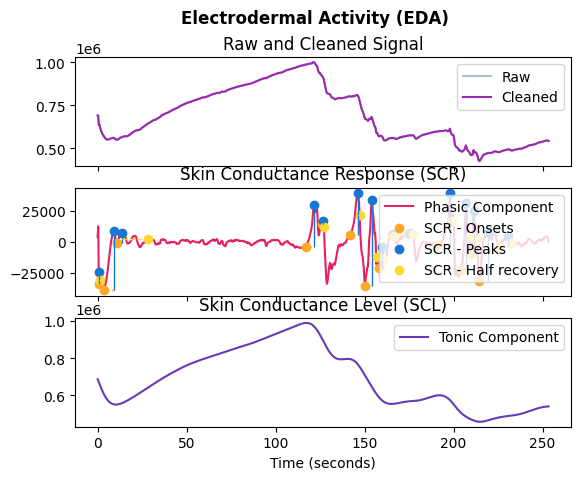

In [7]:
nk.eda_plot(signals, info)

Y podemos calcular métricas relevantes de la señal con las función `eda_analyze`:

In [6]:
analyze_df = nk.eda_analyze(signals, sampling_rate=3, method="interval-related")
analyze_df

,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
0,16.0,26755.845126,160554.02827,1.616763e+08,0.001971,0.972385
